In [120]:
#Import Libraries

from dateutil.parser import parse 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
warnings.filterwarnings(action='ignore')

In [121]:
## Truck Payload files
truck_payload_1_10 = pd.read_csv("Data sets\/Payload trucks 1_10 updated.csv")
truck_payload_11_20 = pd.read_csv("Data sets\/Payload trucks 11_20 updated.csv")

df1 = truck_payload_1_10.copy()
df2 = truck_payload_11_20.copy()

print('Files load Succesfully.....')

Files load Succesfully.....


In [122]:
df1.head()

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_LOCAL
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193.0,454.0,711.0,3.6,648.0,610.0,2.8,5.0,77.600942,79.0,22-JUL-16 12.44.52.000000000 AM
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323.0,99.0,177.0,0.6,56.0,1225.0,6.8,6.0,177.914355,73.0,22-JUL-16 01.30.20.000000000 AM
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321.0,864.0,867.0,5.7,61.0,857.0,4.6,4.0,138.167531,100.0,22-JUL-16 02.02.59.000000000 AM
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361.0,594.0,667.0,4.6,63.0,871.0,4.6,4.0,140.060237,99.0,22-JUL-16 02.54.33.000000000 AM
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218.0,689.0,894.0,6.4,3725.0,1130.0,4.4,5.0,219.080709,103.0,22-JUL-16 03.38.55.000000000 AM


In [123]:
df2.head()

,MACH_SER_NO,OCUR_TS,Unnamed: 2,SMU,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_L,OCAL
0,Truck 11,22-Jul-16,12.07.18.000000000 AM,23018.03444,399.5,92.0,129.0,231.0,1.6,67.0,513.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.07.18.000000000 AM
1,Truck 11,22-Jul-16,12.25.11.000000000 AM,23018.33250,333.8,133.0,92.0,362.0,2.8,75.0,472.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.25.11.000000000 AM
2,Truck 11,22-Jul-16,12.44.52.000000000 AM,23018.66056,361.2,120.0,30.0,318.0,2.7,76.0,475.0,2.7,4.0,85.171766,66.0,22-Jul-16,11.44.52.000000000 AM
3,Truck 11,22-Jul-16,01.02.31.000000000 AM,23018.95500,365.2,109.0,63.0,305.0,2.7,73.0,497.0,2.8,4.0,86.591295,74.0,22-Jul-16,12.02.31.000000000 PM
4,Truck 11,22-Jul-16,01.20.42.000000000 AM,23019.25806,327.8,93.0,43.0,327.0,2.4,77.0,496.0,2.8,4.0,83.752236,83.0,22-Jul-16,12.20.42.000000000 PM


In [124]:
##Changing Columns name and drop those columns which are not relevant

df2.rename(columns={'OCUR_TS':'OCUR_TS Date','Unnamed: 2':'OCUR_TS Time'},inplace=True) ## Renaming columns same as Truck payload 1_10 file 
df2.drop('OCUR_TS_L', axis=1, inplace=True)
df2.drop('OCAL',axis=1, inplace=True)
df2.drop('SMU', axis=1, inplace=True)

df1.drop('OCUR_TS_LOCAL', axis=1, inplace=True)

In [125]:
df2.columns, df1.columns

(Index(['MACH_SER_NO', 'OCUR_TS Date', 'OCUR_TS Time', 'PAYLD_WT', 'LD_TM',
        'EMTY_STOP_TM', 'EMTY_TRAV_TM', 'EMTY_TRAV_DSTNC', 'LD_STOP_TM',
        'LD_TRAV_TM', 'LD_TRAV_DSTNC', 'LD_PASS_CT', 'FUEL_USED_IN_CYC',
        'SHFT_CT'],
       dtype='object'),
 Index(['MACH_SER_NO', 'OCUR_TS Date', 'OCUR_TS Time', 'PAYLD_WT', 'LD_TM',
        'EMTY_STOP_TM', 'EMTY_TRAV_TM', 'EMTY_TRAV_DSTNC', 'LD_STOP_TM',
        'LD_TRAV_TM', 'LD_TRAV_DSTNC', 'LD_PASS_CT', 'FUEL_USED_IN_CYC',
        'SHFT_CT'],
       dtype='object'))

<font size='5'>**Analyzing loaded data, for missing values**</font>

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70653 entries, 0 to 70652
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MACH_SER_NO       4404 non-null   object 
 1   OCUR_TS Date      4404 non-null   object 
 2   OCUR_TS Time      4404 non-null   object 
 3   PAYLD_WT          4404 non-null   float64
 4   LD_TM             4404 non-null   float64
 5   EMTY_STOP_TM      4404 non-null   float64
 6   EMTY_TRAV_TM      4404 non-null   float64
 7   EMTY_TRAV_DSTNC   4404 non-null   float64
 8   LD_STOP_TM        4404 non-null   float64
 9   LD_TRAV_TM        4404 non-null   float64
 10  LD_TRAV_DSTNC     4404 non-null   float64
 11  LD_PASS_CT        4404 non-null   float64
 12  FUEL_USED_IN_CYC  4404 non-null   float64
 13  SHFT_CT           4404 non-null   float64
dtypes: float64(11), object(3)
memory usage: 7.5+ MB


In [127]:
df1.describe()

,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT
count,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000
mean,333.875477,181.831290,454.724796,652.557902,3.844460,494.990463,860.663261,4.116894,4.123751,140.974035,93.418256
std,58.505307,109.133516,683.359213,275.309613,1.855567,751.357734,290.729274,1.604505,0.923801,45.905858,30.371788
min,0.000000,4.000000,0.000000,0.000000,0.000000,42.000000,30.000000,0.000000,1.000000,4.258588,2.000000
25%,320.800000,129.000000,54.000000,469.750000,2.400000,73.000000,675.000000,2.800000,4.000000,112.616002,72.000000
50%,344.300000,155.000000,196.000000,635.000000,3.800000,174.500000,845.000000,4.000000,4.000000,137.694355,90.000000
75%,364.425000,202.000000,520.250000,808.000000,5.100000,618.000000,1005.000000,5.200000,5.000000,169.397179,110.000000
max,548.700000,2378.000000,6556.000000,2382.000000,16.000000,9186.000000,3339.000000,16.600000,9.000000,412.136712,244.000000


In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106989 entries, 0 to 106988
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MACH_SER_NO       10426 non-null  object 
 1   OCUR_TS Date      10426 non-null  object 
 2   OCUR_TS Time      10426 non-null  object 
 3   PAYLD_WT          10426 non-null  float64
 4   LD_TM             10426 non-null  float64
 5   EMTY_STOP_TM      10426 non-null  float64
 6   EMTY_TRAV_TM      10426 non-null  float64
 7   EMTY_TRAV_DSTNC   10426 non-null  float64
 8   LD_STOP_TM        10426 non-null  float64
 9   LD_TRAV_TM        10426 non-null  float64
 10  LD_TRAV_DSTNC     10426 non-null  float64
 11  LD_PASS_CT        10426 non-null  float64
 12  FUEL_USED_IN_CYC  10426 non-null  float64
 13  SHFT_CT           10426 non-null  float64
dtypes: float64(11), object(3)
memory usage: 11.4+ MB


In [129]:
df2.describe()

,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT
count,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000
mean,345.310963,125.278630,246.036064,465.029542,4.013457,88.145885,651.596777,4.346154,4.303088,109.808167,92.297717
std,37.246581,40.311173,445.623349,160.252588,1.576397,257.277889,188.877629,1.449675,1.040856,31.637222,23.894890
min,0.000000,17.000000,0.000000,0.000000,0.000000,36.000000,17.000000,0.000000,1.000000,9.463530,26.000000
25%,331.600000,102.000000,52.000000,353.000000,3.000000,55.000000,541.000000,3.500000,4.000000,91.323060,76.000000
50%,348.300000,115.000000,135.000000,500.000000,4.100000,61.000000,677.000000,4.400000,4.000000,112.616002,92.000000
75%,365.400000,137.000000,266.000000,571.000000,5.200000,72.000000,781.000000,5.600000,5.000000,128.704002,109.000000
max,437.600000,1626.000000,12149.000000,1758.000000,14.700000,9915.000000,1711.000000,10.500000,10.000000,245.105415,219.000000


<font size="5">No Null value found in the dataset, So we can keep working with this data</font><br>
&nbsp;      





In [130]:
df_total = df1.append(df2)
mch_dict = dict()


# mch_no, values = list(), list()
for i,j in list(df_total.groupby(['MACH_SER_NO'])):
    mch_dict[i] = j.PAYLD_WT.sum()

df = pd.DataFrame(list(zip(mch_dict.keys(), mch_dict.values())), columns=['Truck Number','Total Tons moved by Truck'] )
# df['Total Tons moved by Truck'] = df['Total Tons moved by Truck'].div(1000).round(2) # Assuming moved weight in kg's and converting into tons

## *Q1. Total tones moved by each truck as well as all the trucks combined?*

Total Tons moved by All Trucks:  5070599.7


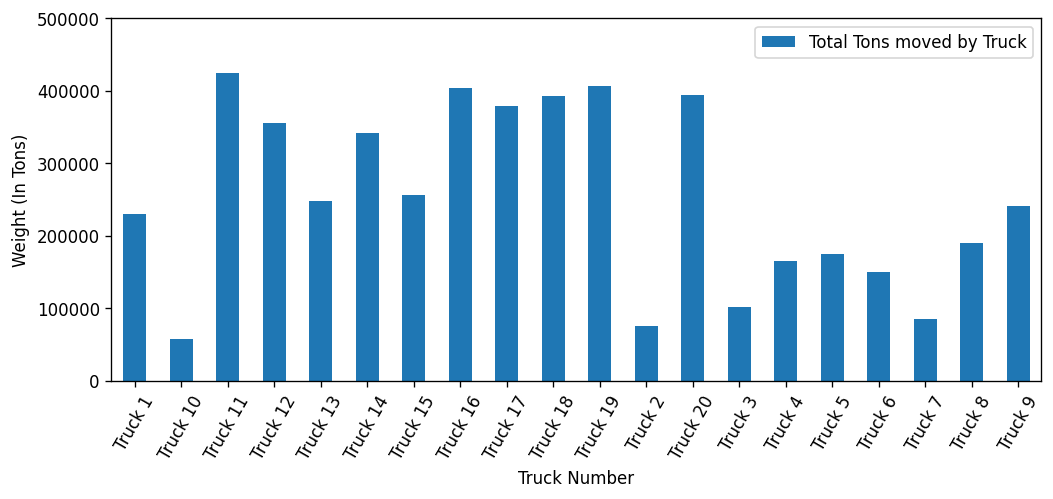

In [131]:
## Plotting Truck and Tons moved by trucks


df.plot(kind='bar', x='Truck Number', y='Total Tons moved by Truck',rot=60, sort_columns=True, ylim=(0,500000), figsize=(10,4))
plt.ylabel('Weight (In Tons)')
print("Total Tons moved by All Trucks: ", df['Total Tons moved by Truck'].sum().round(2) )

## Q2. Average Tons Moved per truck ?

In [132]:
for truck, weight in df_total.groupby(['MACH_SER_NO']).PAYLD_WT:
    print(f'Average Tons moved by {truck} is {round(sum(weight)/len(weight), 2)} Ton')
    

Average Tons moved by Truck 1 is 338.88 Ton
Average Tons moved by Truck 10 is 354.65 Ton
Average Tons moved by Truck 11 is 350.95 Ton
Average Tons moved by Truck 12 is 352.23 Ton
Average Tons moved by Truck 13 is 346.38 Ton
Average Tons moved by Truck 14 is 312.58 Ton
Average Tons moved by Truck 15 is 344.66 Ton
Average Tons moved by Truck 16 is 351.54 Ton
Average Tons moved by Truck 17 is 348.36 Ton
Average Tons moved by Truck 18 is 348.79 Ton
Average Tons moved by Truck 19 is 348.17 Ton
Average Tons moved by Truck 2 is 344.5 Ton
Average Tons moved by Truck 20 is 348.78 Ton
Average Tons moved by Truck 3 is 365.17 Ton
Average Tons moved by Truck 4 is 336.32 Ton
Average Tons moved by Truck 5 is 351.29 Ton
Average Tons moved by Truck 6 is 348.99 Ton
Average Tons moved by Truck 7 is 334.36 Ton
Average Tons moved by Truck 8 is 269.46 Ton
Average Tons moved by Truck 9 is 350.05 Ton


In [133]:
df_total.head()

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193.0,454.0,711.0,3.6,648.0,610.0,2.8,5.0,77.600942,79.0
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323.0,99.0,177.0,0.6,56.0,1225.0,6.8,6.0,177.914355,73.0
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321.0,864.0,867.0,5.7,61.0,857.0,4.6,4.0,138.167531,100.0
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361.0,594.0,667.0,4.6,63.0,871.0,4.6,4.0,140.060237,99.0
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218.0,689.0,894.0,6.4,3725.0,1130.0,4.4,5.0,219.080709,103.0


## Q3. Tones per Gallon per distance travelled matrix for each truck and all trucks

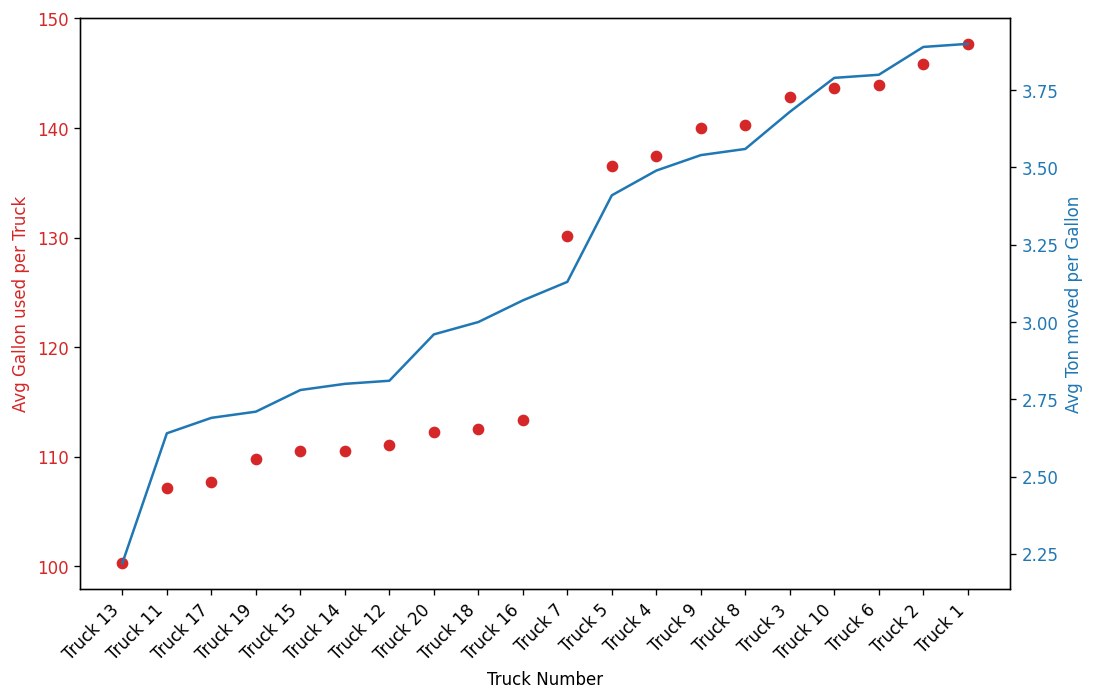

In [134]:
## Gallon used per Distance travelled/ per cycle
avg_gallon_used_per_truck = dict()
for name, data in df_total.groupby(['MACH_SER_NO']):
    avg_gallon_used_per_truck[name] = round(data.FUEL_USED_IN_CYC.sum()/len(data),2)

avg_gallon_used_per_truck = sorted(avg_gallon_used_per_truck.items(), key = lambda x:x[1])
df_gallon_per_truck = pd.DataFrame(avg_gallon_used_per_truck, columns=['Truck Number', 'Avg Gallon used per truck'])


## Plotting the finded insights
# df_gallon_per_truck.plot(kind='bar', x='Truck Number', y='Avg Gallon used per truck', figsize=(10,3),rot=60)

## Avrage Tones moved per Gallon
avg_ton_moved_per_gallon = dict()
for name, data in df_total.groupby(['MACH_SER_NO']):
    avg_ton_moved_per_gallon[name] = round((data.PAYLD_WT/data.FUEL_USED_IN_CYC).sum()/len(data),2)
#     avg_gallon_used_per_cycle[name] = round(data..sum()/len(data),2)
avg_ton_moved_per_gallon = sorted(avg_ton_moved_per_gallon.items(), key=lambda x:x[1])
df_ton_per_gallon = pd.DataFrame(avg_ton_moved_per_gallon, columns=['Truck Number', 'Avg ton moved per gallon'])
# df_ton_per_gallon.plot(kind='bar', x='Truck Number', y='Avg ton moved per gallon', figsize=(10,3))


## Creating and Plotting two different plots in one graph
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Truck Number')
ax1.set_ylabel('Avg Gallon used per Truck',color=color)
ax1.scatter(df_gallon_per_truck['Truck Number'], df_gallon_per_truck['Avg Gallon used per truck'], color= color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Avg Ton moved per Gallon',color=color)
ax2.plot(df_gallon_per_truck['Truck Number'], df_ton_per_gallon['Avg ton moved per gallon'], color= color)
ax2.tick_params(axis='y', labelcolor=color)


fig.autofmt_xdate(rotation=45)
fig.tight_layout
plt.show()



## Q4. Which truck is running most efficient and which truck is running most inefficient as per as the matrix in item number 3? <br>
<font size=4>**Ans.** From Above plot we can clearly see: <br> 
    1. **Truck Number 1** is Running very efficiently <br>
    2. **Truck Number 13** is Running very Inefficiently 
    </font>

## Q5. Show Visually which truck has travelled empty most distance ?


<AxesSubplot:xlabel='Truck Number', ylabel='total_dist'>

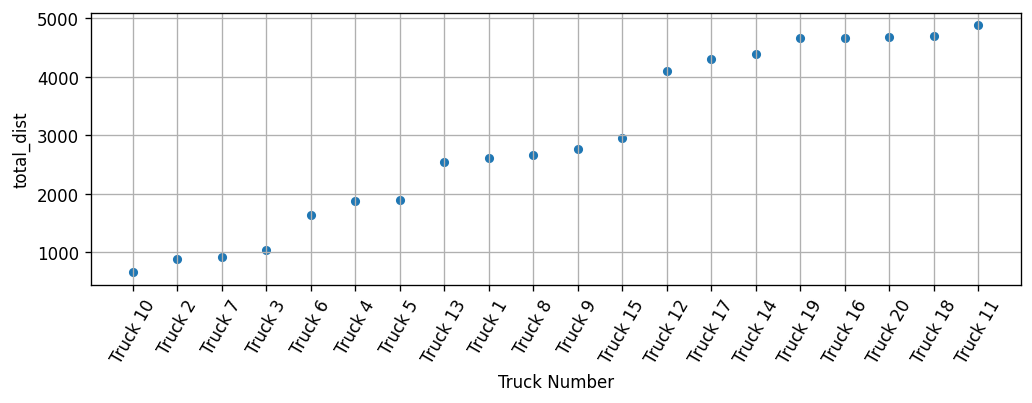

In [135]:
trav_dist = dict()
for name, data in df_total.groupby(['MACH_SER_NO']):
    trav_dist[name] = round(data.EMTY_TRAV_DSTNC.sum(), 2)
    

trav_dist = sorted(trav_dist.items(), key = lambda x:x[1])
trav_dist = pd.DataFrame(trav_dist, columns=['Truck Number', 'total_dist'])
trav_dist.head()

trav_dist.plot(kind='scatter', x='Truck Number', y='total_dist', rot=60, figsize=(10,3),grid=True)
# plt.set_xlable('Travel dist (KM)')

# df_total.head()

* <font size=4>It clearly show that **Truck 11** is travelled empty Maximum distance</font>

## Q6. Show visually which truck has Max and Min Gear Shifts per Mile ?

In [136]:
df_total

round((df_total.LD_TRAV_DSTNC + df_total.EMTY_TRAV_DSTNC).sum()/ df_total.SHFT_CT.sum(),2)

0.09

<AxesSubplot:xlabel='Truck Number', ylabel='gear_shift'>

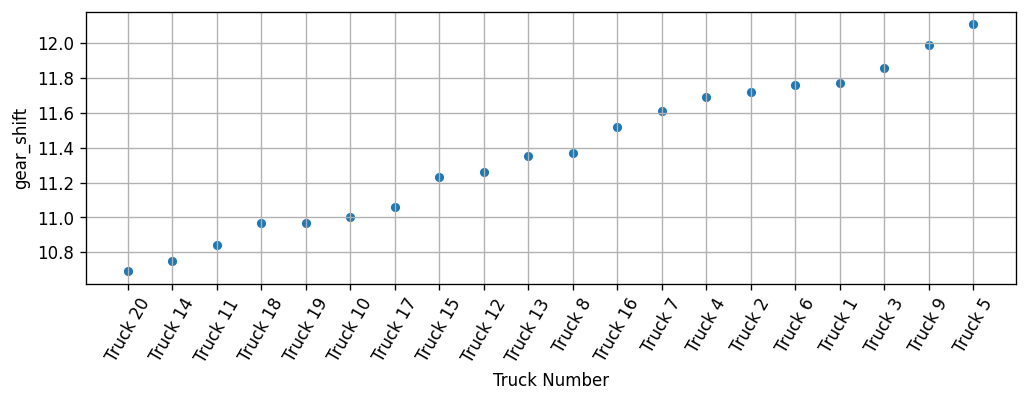

In [137]:
avg_gear_shift = dict()
for name, data in df_total.groupby(['MACH_SER_NO']):
    avg_gear_shift[name] = round(data.SHFT_CT.sum()/(data.EMTY_TRAV_DSTNC + data.LD_TRAV_DSTNC).sum(), 2)
    

avg_gear_shift = sorted(avg_gear_shift.items(), key = lambda x:x[1])
avg_gear_shift = pd.DataFrame(avg_gear_shift, columns=['Truck Number', 'gear_shift'])
avg_gear_shift.head()

avg_gear_shift.plot(kind='scatter', x='Truck Number', y='gear_shift', rot=60, figsize=(10,3),grid=True)
# plt.set_xlable('Travel dist (KM)')

# df_total.head()

* <font size=4>**Truck 5** has Max number of Gear shift per Mile <br>
* **Truck 20** has Min(least) number of Gear shift per Mile</font>

## Q7. Which truck has max stop time in empty ?

In [138]:

df_total.groupby(['MACH_SER_NO']).EMTY_STOP_TM.sum()

MACH_SER_NO
Truck 1     311611.0
Truck 10     79695.0
Truck 11    245703.0
Truck 12    238897.0
Truck 13    178678.0
Truck 14    280399.0
Truck 15    174731.0
Truck 16    277168.0
Truck 17    276232.0
Truck 18    319210.0
Truck 19    281707.0
Truck 2     109125.0
Truck 20    292447.0
Truck 3     118939.0
Truck 4     224559.0
Truck 5     227698.0
Truck 6     193946.0
Truck 7     104546.0
Truck 8     298928.0
Truck 9     333561.0
Name: EMTY_STOP_TM, dtype: float64

<font size=4>Truck 9 has max number of stop time while empty.</font>

## Q8. Total distance travelled by each truck as well as all trucks combined ?

In [139]:
trvl_dist = dict()
for name, data in df_total.groupby(['MACH_SER_NO']):
    trvl_dist[name] = round((data.EMTY_TRAV_DSTNC + data.LD_TRAV_DSTNC).sum(),2)

trvl_list = sorted(trvl_dist.items(), key= lambda x : x[1]) 
total_dist_by_all_truck = 0
for i in trvl_list:
    print(f"Total Distance travelled by {i[0]} is : {i[1]}")
    total_dist_by_all_truck += i[1]

print('\n')
print(f"Total Distance covered by all trucks is: {total_dist_by_all_truck}")

Total Distance travelled by Truck 10 is : 1338.9
Total Distance travelled by Truck 2 is : 1807.6
Total Distance travelled by Truck 7 is : 1971.0
Total Distance travelled by Truck 3 is : 2173.6
Total Distance travelled by Truck 6 is : 3416.8
Total Distance travelled by Truck 4 is : 3826.2
Total Distance travelled by Truck 5 is : 3896.4
Total Distance travelled by Truck 13 is : 5228.9
Total Distance travelled by Truck 1 is : 5395.9
Total Distance travelled by Truck 8 is : 5598.4
Total Distance travelled by Truck 9 is : 5637.0
Total Distance travelled by Truck 15 is : 6151.8
Total Distance travelled by Truck 12 is : 8573.7
Total Distance travelled by Truck 17 is : 8981.9
Total Distance travelled by Truck 14 is : 9131.5
Total Distance travelled by Truck 19 is : 9700.8
Total Distance travelled by Truck 20 is : 9701.3
Total Distance travelled by Truck 16 is : 9723.2
Total Distance travelled by Truck 18 is : 9831.9
Total Distance travelled by Truck 11 is : 10132.3


Total Distance covered by 